# Exploración

Importamos librerías necesarias:

In [25]:
#instalamos las librerías necesarias
import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import missingno as msno
from scipy.stats import skew

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, label_binarize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier,  GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold, cross_val_predict, cross_val_score, GridSearchCV, KFold, LeaveOneOut, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow import get_logger
from tensorflow.keras import layers

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Funciones útiles:

In [26]:
def plot_confusion_matrix(X, y, gsearch, p, seed):
  print('\n================================================')
  print('MATRIZ DE CONFUSION:')
  print('================================================')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state=seed)

  y_hat_train = gsearch.predict(X_train)
  y_hat_test = gsearch.predict(X_test)

  print('Confusion matrix train:\n', 'Train score: ', round(gsearch.score(X_train, y_train),3))
  ConfusionMatrixDisplay.from_estimator(estimator=gsearch, X=X_train, y=y_train)
  plt.show()

  print('\nConfusion matrix test:\n','Test score: ', round(gsearch.score(X_test, y_test), 3))
  ConfusionMatrixDisplay.from_estimator(estimator=gsearch, X=X_test, y=y_test)  
  plt.show()

In [27]:
# Load the data
data = pd.read_csv("C:\\Users\\pablo\\OneDrive\\Documentos\\GitHub\\MasterBigDataML-MachineLearningI\\src\\data\\datos_practica_miss.csv")

data = data.sample(n=1000, random_state=4975)
data.head(10)

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
371,371,Male,17.000000,1.620000,69.000000,yes,yes,3.000000,1.000000,Always,no,2.000000,yes,1.000000,2.000000,NaN,NaN,Overweight_Level_I
395,395,Female,20.000000,1.540000,39.000000,yes,yes,1.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
350,350,Male,17.000000,1.750000,70.000000,yes,no,2.000000,3.000000,Sometimes,no,1.000000,no,3.000000,2.000000,Sometimes,Walking,Normal_Weight
1216,1216,Female,42.316070,1.583943,81.936398,yes,yes,2.490507,2.974204,Sometimes,no,1.846754,no,0.000000,0.000000,no,Automobile,Obesity_Type_I
2025,2025,Female,21.394047,1.792933,137.832414,yes,yes,3.000000,3.000000,Sometimes,no,2.682909,no,1.318743,0.900497,Sometimes,Public_Transportation,Obesity_Type_III
1729,1729,NaN,29.669219,NaN,129.194490,NaN,yes,2.432355,NaN,Sometimes,no,1.336526,NaN,1.638120,NaN,NaN,NaN,NaN
1652,1652,Male,25.058566,1.764484,113.234349,yes,yes,1.517912,3.000000,Sometimes,no,2.038958,no,1.590255,0.001640,Sometimes,Public_Transportation,Obesity_Type_II
2016,2016,Female,25.940153,1.596813,102.320437,yes,yes,3.000000,3.000000,Sometimes,no,1.000536,no,0.005939,0.566353,Sometimes,Public_Transportation,Obesity_Type_III
364,364,Male,24.000000,1.840000,86.000000,yes,yes,2.000000,1.000000,Always,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_I
855,855,Male,21.000000,1.676014,75.000000,yes,yes,2.000000,3.000000,Sometimes,no,1.164062,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I


Vemos los tipos de las variables:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 371 to 1382
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1000 non-null   int64  
 1   Gender                          983 non-null    object 
 2   Age                             977 non-null    float64
 3   Height                          975 non-null    float64
 4   Weight                          977 non-null    float64
 5   family_history_with_overweight  976 non-null    object 
 6   FAVC                            975 non-null    object 
 7   FCVC                            977 non-null    float64
 8   NCP                             973 non-null    float64
 9   CAEC                            975 non-null    object 
 10  SMOKE                           984 non-null    object 
 11  CH2O                            980 non-null    float64
 12  SCC                             981 n

In [29]:
# Obtener los nombres de las columnas del DataFrame
column_names = data.columns.tolist()
column_names

['Unnamed: 0',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

Buscamos valores nulos:

In [30]:
#busca nulos
data.isna().sum()

Unnamed: 0                         0
Gender                            17
Age                               23
Height                            25
Weight                            23
family_history_with_overweight    24
FAVC                              25
FCVC                              23
NCP                               27
CAEC                              25
SMOKE                             16
CH2O                              20
SCC                               19
FAF                               27
TUE                               19
CALC                              19
MTRANS                            20
NObeyesdad                        20
dtype: int64

In [31]:


#busca duplicados
print(data.duplicated().sum()) #para ver si hay alguna obs duplicada
print(data.shape) #tamaño (filasxcolumnas) del archivo
data = data.drop_duplicates() #eliminar duplicados (si procede)
print(data.duplicated().sum())
print(data.shape)

0
(1000, 18)
0
(1000, 18)


Usando la librería Missingno visualiazmos grafiacmente los valores perdidos:

<Axes: >

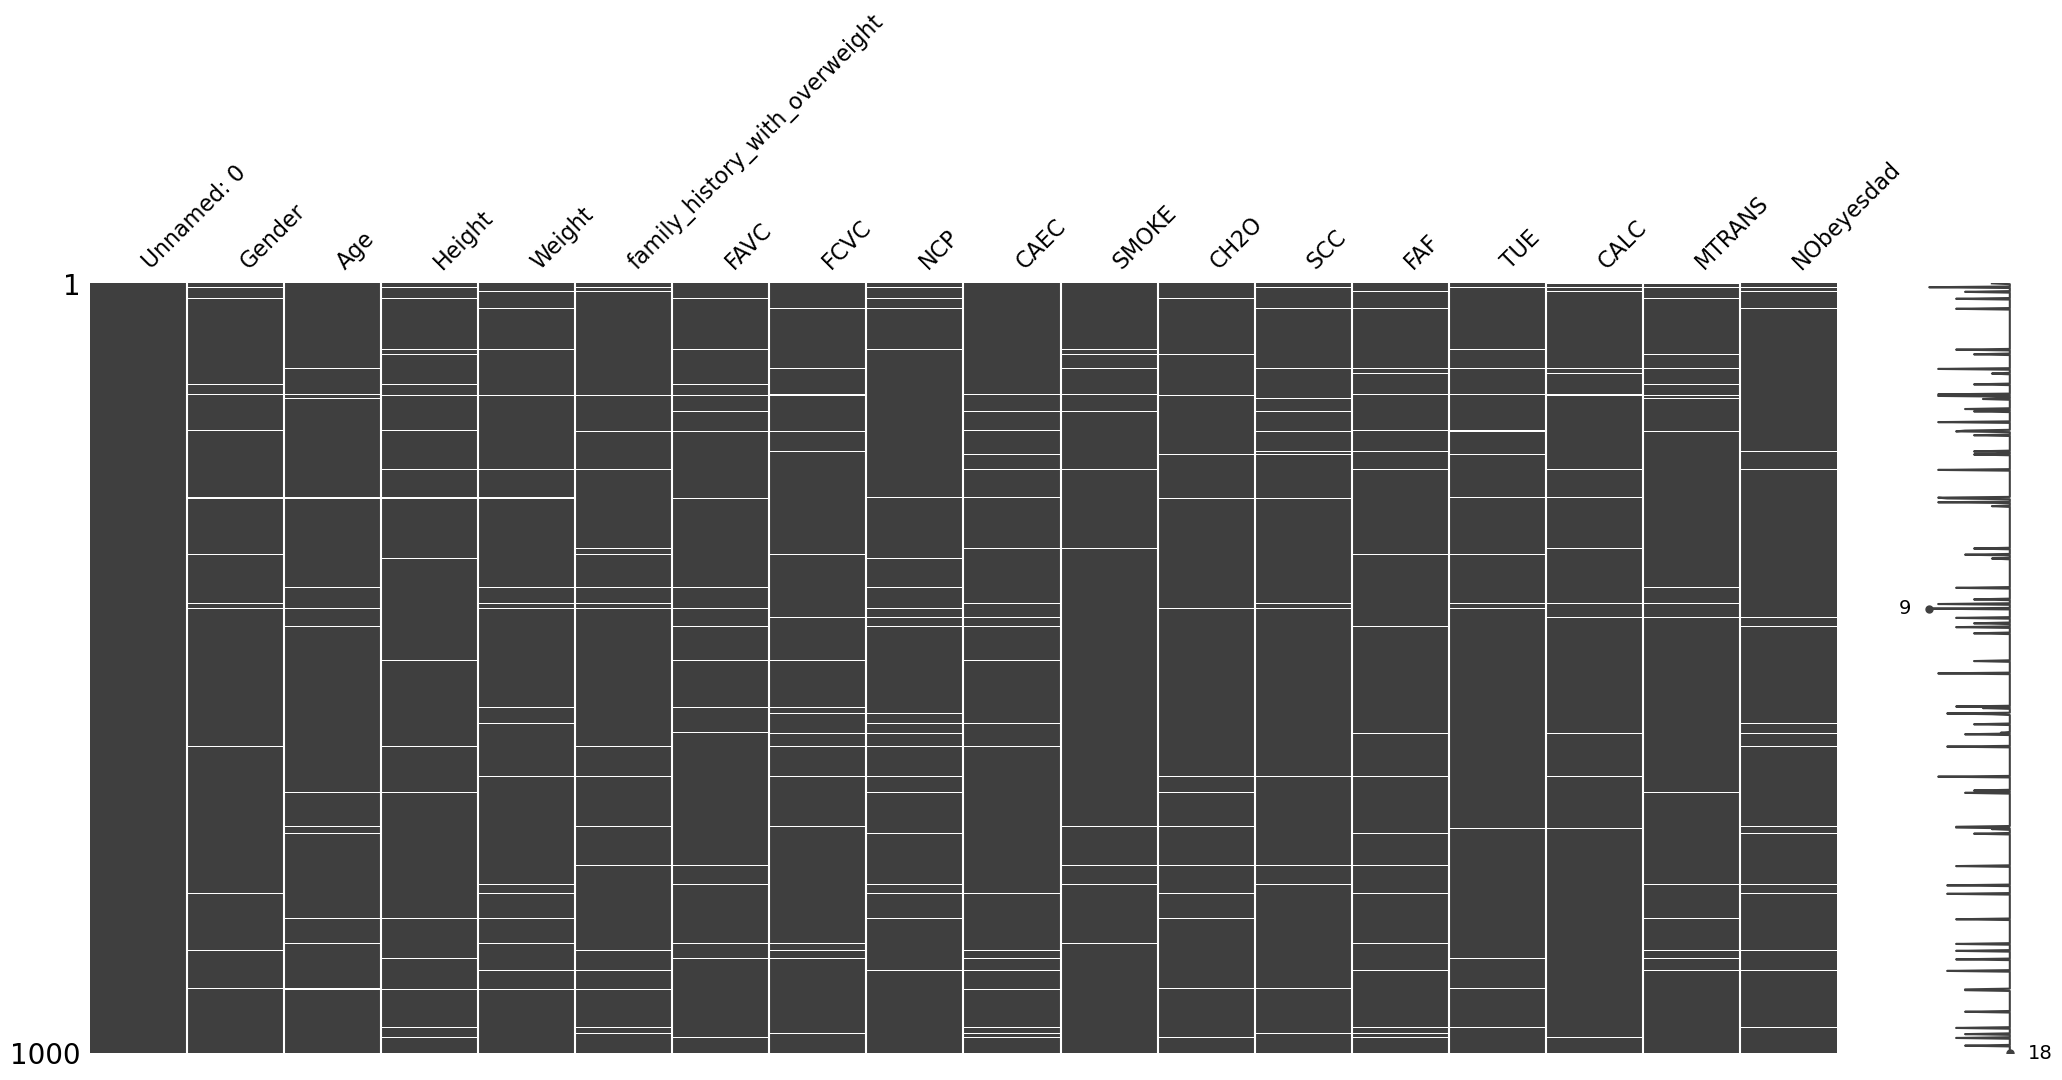

In [32]:
# Visualize the missing data using missingno's matrix visualization
msno.matrix(data)

Vemos que para lidiar con los valores perdidos tendremos que hacer un análisis por variable imputando sus valores perdidos.

En primer lugar eliminamos las filas con valores perdidos en la variable objetivo. Después eliminamos la primera columna pues no parece relevante para el análisis. Después imputamos valores perdidios sustituyendo las numéricas por la media o mediana y las categóricas por la moda: 

In [33]:
# Drop the 'Unnamed: 0' column as it's redundant
data.drop('Unnamed: 0', axis=1, inplace=True)

# Remove rows where the target variable 'NObeyesdad' is missing
data = data.dropna(subset=['NObeyesdad'])

# Determine the skewness of numerical columns and impute accordingly
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for column in numerical_columns:
    if abs(skew(data[column].dropna())) > 1:
        # If skewed, use median for imputation
        data[column].fillna(data[column].median(), inplace=True)
    else:
        # If not skewed, use mean for imputation
        data[column].fillna(data[column].mean(), inplace=True)

# Impute missing values for categorical columns with the mode, excluding the target variable
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check for any remaining missing values
data.isnull().sum()

C:\Users\pablo\AppData\Local\Temp\ipykernel_16456\1741809291.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_16456\1741809291.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Vamos a sustituir los valores de la variable objetivo en 0 o 1 dependiendo de si es un caso de Obesidad (0), No obesidad (1).

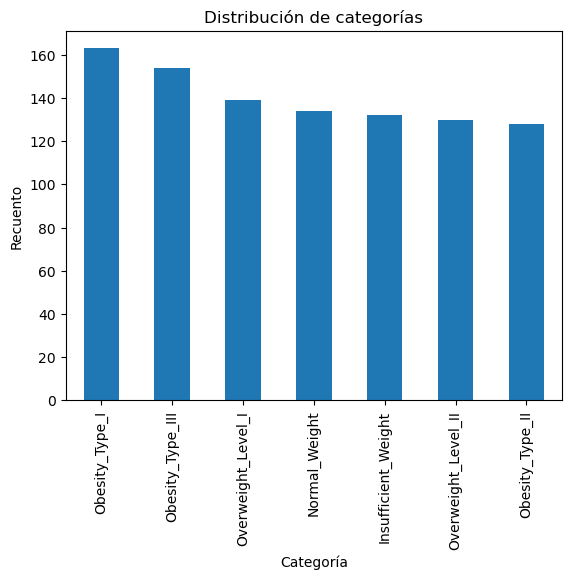

In [34]:
data['NObeyesdad'].value_counts().plot(kind='bar')
plt.title('Distribución de categorías')
plt.xlabel('Categoría')
plt.ylabel('Recuento')
plt.show()

In [35]:
obesity_mapping = {
    'Obesity_Type_I': 0,
    'Obesity_Type_II': 0,
    'Obesity_Type_III': 0,
    'Overweight_Level_I': 1,
    'Overweight_Level_II': 1,
    'Normal_Weight': 1,
    'Insufficient_Weight': 1
}

data['NObeyesdad'] = data['NObeyesdad'].map(obesity_mapping)
data['NObeyesdad'].value_counts()

NObeyesdad
1    535
0    445
Name: count, dtype: int64

In [36]:
# Definir el ColumnTransformer
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns)
)

# Crear un pipeline con el preprocesamiento y el modelo de clasificación
model = make_pipeline(preprocessor, LogisticRegression())
#como le voy a aplicar el transformador al pipeline, hay que proporcionarle las variables originales
explicativas = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(explicativas, y, test_size=0.2, random_state=4975)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9693877551020408
